# Fake News Detector

## Installing Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Loading the data

In [3]:
data_fake=pd.read_csv('Fake.csv')
data_true=pd.read_csv('True.csv')

### Data Preview 

In [4]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [6]:
data_fake["class"]=0
data_true['class']=1

In [7]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [8]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)

    
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)
    
    

In [9]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [10]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

C:\Users\srika\AppData\Local\Temp\ipykernel_16180\1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
C:\Users\srika\AppData\Local\Temp\ipykernel_16180\1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [11]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [14]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [15]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [16]:
#count of missing values
data.isnull().sum() 

text     0
class    0
dtype: int64

#### Randomly shuffling the dataframe 

In [17]:
data = data.sample(frac = 1)

In [18]:
data.head()

,text,class
1882,"Never shy to speak her mind, Dixie Chicks Nat...",0
20504,LONDON (Reuters) - North Korea s reckless beh...,1
12004,"British pop singer Rebecca Ferguson, daughter ...",0
1509,While the Republican Party rants on and on abo...,0
1666,(Reuters) - U.S. Senate Republicans are making...,1


In [19]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [20]:
data.columns

Index(['text', 'class'], dtype='object')

In [21]:
data.head()

,text,class
0,"Never shy to speak her mind, Dixie Chicks Nat...",0
1,LONDON (Reuters) - North Korea s reckless beh...,1
2,"British pop singer Rebecca Ferguson, daughter ...",0
3,While the Republican Party rants on and on abo...,0
4,(Reuters) - U.S. Senate Republicans are making...,1


## Preprocessing Text

#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [22]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\srika\AppData\Local\Temp\ipykernel_16180\1003490320.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]','',text)
C:\Users\srika\AppData\Local\Temp\ipykernel_16180\1003490320.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+','',text)
C:\Users\srika\AppData\Local\Temp\ipykernel_16180\1003490320.py:8: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*','',text)


In [23]:
data['text'] = data['text'].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [24]:
x = data['text']
y = data['class']

## Training the model

#### Splitting the dataset into training set and testing set. 

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

### Extracting Features from the Text

#### Convert text to vectors

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [29]:
pred_lr = LR.predict(xv_test)

In [30]:
LR.score(xv_test, y_test)

0.9862745098039216

In [31]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5905
           1       0.98      0.99      0.99      5315

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [33]:
pred_dt = DT.predict(xv_test)

In [34]:
DT.score(xv_test, y_test)

0.9954545454545455

In [35]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5905
           1       0.98      0.99      0.99      5315

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Gradient Boost Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [37]:
pred_gb = GB.predict(xv_test)

In [38]:
GB.score(xv_test, y_test)

0.9959893048128342

In [39]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5905
           1       0.99      1.00      1.00      5315

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [41]:
pred_rf = RF.predict(xv_test)

In [42]:
RF.score(xv_test, y_test)

0.9906417112299465

In [43]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5905
           1       0.99      0.99      0.99      5315

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Testing the Model

In [44]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    
    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction:{}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                             output_lable(pred_GB[0]),
                                                                                                             output_lable(pred_RF[0])))

Federal health officials told the AP they have not received any reports of Ebola cases at the Nevada event. A screenshot of a supposed post from the Centers for Disease Control and Prevention confirming such cases was fabricated. And there is no record of a national emergency being declared. The claims emerged after summer storm left muddy roads flooded, stranding tens of thousands of partygoers; event organizers let traffic flow out of the main road Monday afternoon. “So it was announced earlier that Burning Man was declared a national emergency because it was flooded, and so they sent in FEMA,” a woman claims in a TikTok video shared on Instagram, suggesting the development was suspicious. The AP found no record, including on federal websites and in White House announcements, of a national emergency declaration and FEMA confirmed that it was not involved in the situation. “No FEMA personnel or assets have been deployed to the Burning Man festival and there are no requests from local or state authorities for our assistance,” FEMA spokesperson Jeremy Edwards said in an email. The TikTok video, like other posts, goes on to relay baseless rumors of reported cases of Ebola, whose occasional outbreaks in humans primarily occur in Africa, at the festival. Some posts also shared an image made to appear that the CDC confirmed the supposed outbreak on X, the platform formerly known as Twitter. The purported X post from the agency reads, “Ebola outbreak confirmed at Black Rock City, NV. It is recommended that all Burning Man attendees remain in their dwellings until further notice. Current State of Emergency in progress.” But the CDC’s X account published no such post. “CDC has not received any reports of Ebola at the Burning Man Festival and has not issued any warnings or had any requests for assistance from the state and local health departments either,” agency spokesperson Scott Pauley said in an email. Reverse image searches further show that a graphic about Ebola used in the fictitious CDC post was published by the agency in 2016, but elements of it were changed. For example, the original graphic asks, “Recently in West Africa?” But the version used in the made-up X post asks, “Recently in Nevada?” Referencing more online rumors, Pauley also noted the CDC had not received reports of mpox, formerly known as monkeypox, or Marburg, a rare but severe hemorrhagic fever, in relation to Burning Man. A representative for the Burning Man Project organization also refuted the online claims. “Quite simply, the online rumors of transmissible illnesses in Black Rock City are unfounded and untrue,” Dominique Debucquoy-Dodley said in an email. The festival had been closed to vehicles after more than a half-inch (1.3 centimeters) of rain fell Sept. 1, causing flooding and foot-deep mud, as the AP reported. The annual gathering, which launched on a San Francisco beach in 1986, attracts nearly 80,000 artists, musicians and activists for a mix of wilderness camping and avant-garde performances


MOSCOW (Reuters) - Russiaâ€™s former ambassador to Washington, Sergei Kislyak, said on Saturday his conversations with former White House national security adviser Michael Flynn had been transparent and focused on matters of U.S.-Russia cooperation. Kislyak ended his tenure in Washington in July but remains a key figure in ongoing U.S. investigations into Moscowâ€™s alleged meddling in the 2016 presidential election. Flynn was forced to resign in February after it became known that he had failed to disclose the content of conversations he had with Kislyak and misled U.S. Vice-President Mike Pence about their meetings. â€œWe only spoke about the most simple things ... but the communication was completely correct, calm, absolutely transparent. In any case, there were no secrets on our side,â€ Kislyak said during a panel discussion on Russian television. â€œThere are a number of issues which are important for cooperation between Russia and the United States - most of all, terrorism. And that was one of the things we discussed.â€ 


In [47]:
from sklearn.model_selection import cross_val_score

# Example for Logistic Regression
cv_scores = cross_val_score(LR, xv_train, y_train, cv=5)
print(f"Logistic Regression - Cross-validation scores: {cv_scores}")
print(f"Logistic Regression - Average CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Example for Decision Tree
cv_scores = cross_val_score(DT, xv_train, y_train, cv=5)
print(f"Decision Tree - Cross-validation scores: {cv_scores}")
print(f"Decision Tree - Average CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Example for Random Forest
cv_scores = cross_val_score(RF, xv_train, y_train, cv=5)
print(f"Random Forest - Cross-validation scores: {cv_scores}")
print(f"Random Forest - Average CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Example for Gradient Boosting
cv_scores = cross_val_score(GB, xv_train, y_train, cv=5)
print(f"Gradient Boosting - Cross-validation scores: {cv_scores}")
print(f"Gradient Boosting - Average CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")




Cross-validation scores: [0.98202614 0.98395722 0.98262032 0.98870896 0.9858862 ]
Average CV score: 0.9846 (+/- 0.0049)


KeyboardInterrupt: 

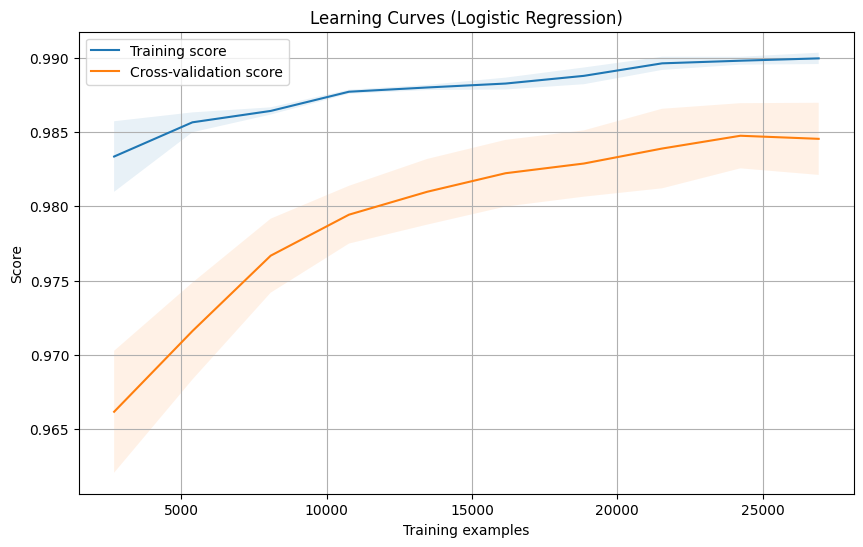

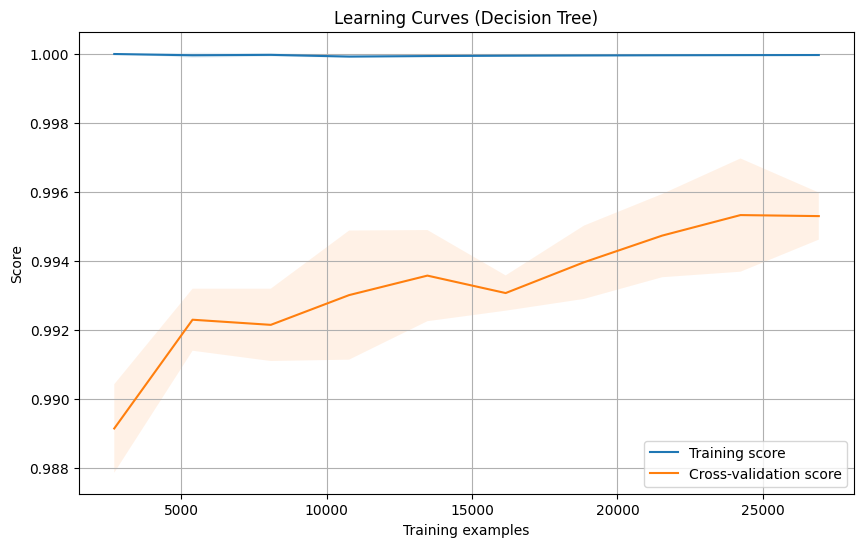

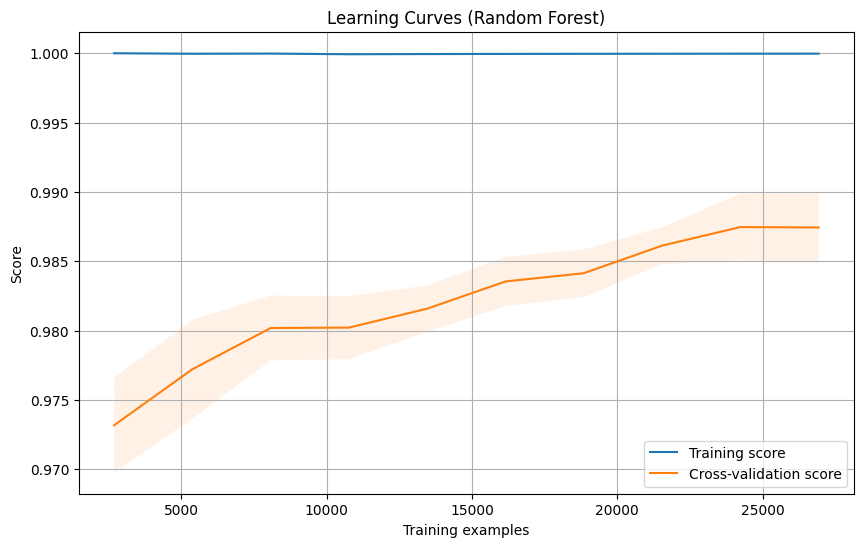

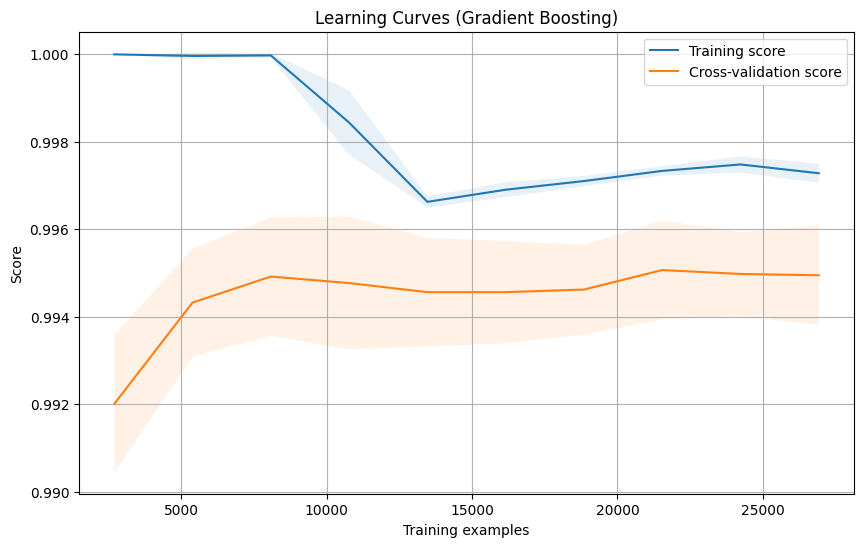

In [48]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label="Training score")
    plt.plot(train_sizes, test_mean, label="Cross-validation score")
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    
    plt.grid()
    plt.legend(loc="best")
    plt.show()

# Plot learning curves for your models
plot_learning_curve(LR, "Learning Curves (Logistic Regression)", xv_train, y_train)
plot_learning_curve(DT, "Learning Curves (Decision Tree)", xv_train, y_train)
plot_learning_curve(RF, "Learning Curves (Random Forest)", xv_train, y_train)
plot_learning_curve(GB, "Learning Curves (Gradient Boosting)", xv_train, y_train)



In [52]:
def ensemble_predict(text, models, vectorizer):
    # Preprocess the text
    processed_text = pd.DataFrame({"text": [text]})
    processed_text['text'] = processed_text["text"].apply(wordopt)
    vectorized_text = vectorizer.transform(processed_text["text"])
    
    # Get predictions from all models
    predictions = []
    for model in models:
        pred = model.predict_proba(vectorized_text)[0]
        predictions.append(pred)
    
    # Average the predictions
    avg_pred = np.mean(predictions, axis=0)
    return avg_pred[1]

# Use the ensemble
models_list = [LR, DT, GB, RF]
result = ensemble_predict(input("Ensembling text input: "), models_list, vectorization)
result

0.09443823500836157

### Model Testing With Manual Entry

In [45]:
news = str(input()) 
manual_testing(news)



LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Fake News


In [46]:
news=str(input())
manual_testing(news)



LR Predicition: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction:Not A Fake News
